# Analyse Cancer Data


## Task A
## Enable the user to get data from a CSV file

In [1]:
from src.wrangling.extract_data_csv import get_csv_data
from src.wrangling.userInterface.user_selections import set_user_file, data_path

# prompt the user to enter the dataset to be analysed
# file_name = set_user_file()
file_name = "lung_cancer_data.csv"

patient_headers, csv_reader = get_csv_data(data_path, file_name)



dataset headers:
('Patient_ID', 'Age', 'Gender', 'Smoking_History', 'Tumor_Size_mm', 'Tumor_Location', 'Stage', 'Treatment', 'Survival_Months', 'Ethnicity', 'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes', 'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease', 'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease', 'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other', 'Performance_Status', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Haemoglobin_Level', 'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level', 'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level', 'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level', 'Sodium_Level', 'Smoking_Pack_Years')


## a1. Retrieve demographic information: age, gender, smoking history, and ethnicity based on the patient ID

In [4]:
from src.wrangling.extract_data_csv import demographic_info
from src.wrangling.userInterface.user_selections import set_patient_id

demographic_info(set_patient_id(), csv_reader, patient_headers)
        

Demographic info for patient ID: 24721
| Age             | Gender          | Smoking_History | Ethnicity       |
-------------------------------------------------------------------------
| 76              | Male            | Former Smoker   | African American |



## a2. Retrieve medical history details including family history of lung cancer, comorbidities of diabetes disease, comorbidities of kidney disease, and the haemoglobin level associated with a certain ethnicity. 

In [2]:
from src.wrangling.extract_data_csv import medical_history
from src.wrangling.userInterface.user_selections import set_patient_ethnicity

medical_history(set_patient_ethnicity(), csv_reader, patient_headers)
        

Records for patients of African american ethnicity:
| Family_History             | Comorbidity_Diabetes       | Comorbidity_Kidney_Disease | Haemoglobin_Level          |
---------------------------------------------------------------------------------------------------------------------
| Yes                        | No                         | Yes                        | 14.47                      |
| Yes                        | Yes                        | Yes                        | 17.44                      |
| No                         | Yes                        | Yes                        | 16.71                      |
| No                         | Yes                        | No                         | 12.02                      |
| No                         | Yes                        | No                         | 13.81                      |
| No                         | No                         | Yes                        | 11.95                      |
| Ye

## a3. Retrieve treatment details including age, tumor size, tumor location, and tumor stage of patients who have survived more than 100 months on a certain treatment. 

In [3]:
from src.wrangling.extract_data_csv import survival_treatment_details
survival_period_months = 100

survival_treatment_details(survival_period_months, csv_reader, patient_headers)


Patient records for survival greater than 100 months on treatment:

| Age            | Tumor_Size_mm  | Tumor_Location | Stage          |
---------------------------------------------------------------------
| 58             | 78.45          | Lower Lobe     | Stage I        |
| 37             | 87.27          | Lower Lobe     | Stage IV       |
| 48             | 68.1           | Lower Lobe     | Stage IV       |
| 51             | 35.15          | Upper Lobe     | Stage I        |
| 31             | 86.46          | Upper Lobe     | Stage III      |
| 41             | 69.33          | Upper Lobe     | Stage III      |
| 51             | 28.12          | Middle Lobe    | Stage III      |
| 78             | 40.47          | Middle Lobe    | Stage IV       |
| 50             | 17.51          | Lower Lobe     | Stage IV       |
| 76             | 58.55          | Lower Lobe     | Stage IV       |
| 73             | 61.59          | Lower Lobe     | Stage III      |
| 76             | 20.

## a4. For patients that have high blood pressure...
### display treatment type, insurance type, performance status and whether the patient has chronic lung disease.



In [4]:
from src.wrangling.extract_data_csv import hypertension_patients
''' 
    use a suitable value for patient's blood pressure above a desired target
    for cancer patient's. Value obtained from:
    https://cardiooncologyjournal.biomedcentral.com/articles/10.1186/s40959-023-00197-8
'''
blood_press_diastolic_target = 140

hypertension_patients(blood_press_diastolic_target, csv_reader, patient_headers)


Treatment records for patients with diastolic blood pressure above 140 target or hypertension:

| Treatment                        | Insurance_Type                   | Performance_Status               | Comorbidity_Chronic_Lung_Disease |
---------------------------------------------------------------------------------------------------------------------------------------------
| Surgery                          | Medicare                         | 3                                | No                               |
| Radiation Therapy                | Private                          | 4                                | No                               |
| Chemotherapy                     | Other                            | 0                                | Yes                              |
| Chemotherapy                     | Medicare                         | 1                                | No                               |
| Radiation Therapy                | Medicaid       

# Task B

In [2]:
import pandas as pd
from src.wrangling.userInterface.user_selections import set_patient_ethnicity

lung_cancer_df = pd.read_csv(data_path+file_name, sep=',', encoding='utf8')

ethnicity_selection = set_patient_ethnicity()

# lung_cancer_df.head()

## b1. Identify the top 3 treatments for a certain ethnicity where patients have survived more than 100 months.

In [3]:
from src.wrangling.extract_data_pd import patient_long_survival

patient_long_survival(ethnicity_selection, lung_cancer_df)



Top three treatments for Asian group - Surival > 100 months
Treatment
Surgery              288
Radiation Therapy    224
Chemotherapy         149
Name: count, dtype: int64


## b2. Analyse the average white blood cell counts for certain treatments based on a certain ethnicity.

In [4]:
from src.wrangling.extract_data_pd import treatment_white_blood_count
from src.wrangling.userInterface.user_selections import set_patient_treatment

treatment = set_patient_treatment()
treatment_white_blood_count(ethnicity_selection, treatment, lung_cancer_df)

Average white blood cell count for Surgery in Asian ethnic group
6.761765882941471


## b3. Analyse the average number of smoking packs for patients in each treatment group, with a blood pressure (pulse) over 90 and a tumor size smaller than 15.0 mm, based by tumor location

In [3]:
from src.wrangling.extract_data_pd import lung_tumor_data

lung_tumor_data(lung_cancer_df=lung_cancer_df, pulse=90, tumor_size_mm=15.0)


Average numnber of smoking packs for patients with pulse over 90 and tumor size over 15.0 mm
Tumor_Location  Treatment        
Lower Lobe      Chemotherapy         53.168824
                Radiation Therapy    41.365357
                Surgery              51.673684
                Targeted Therapy     43.178000
Middle Lobe     Chemotherapy         51.408966
                Radiation Therapy    50.610741
                Surgery              53.086923
                Targeted Therapy     48.728000
Upper Lobe      Chemotherapy         55.259167
                Radiation Therapy    54.349583
                Surgery              54.312941
                Targeted Therapy     42.567647
Name: Smoking_Pack_Years, dtype: float64


## b4. Average survival duration and blood pressure metrics for each treatment at each cancer stage, based on gender.

In [3]:
from src.wrangling.extract_data_pd import survival_blood_pressure
from src.wrangling.userInterface.user_selections import set_patient_gender

survival_blood_pressure(set_patient_gender(), lung_cancer_df)


average survival duration and blood pressure metrics for Females
| Treatment         | Stage     |   Survival_Months |   Blood_Pressure_Diastolic |   Blood_Pressure_Systolic |
|:------------------|:----------|------------------:|---------------------------:|--------------------------:|
| Chemotherapy      | Stage I   |           60.2487 |                    84.9358 |                   135.046 |
| Chemotherapy      | Stage II  |           58.1472 |                    84.8392 |                   135.858 |
| Chemotherapy      | Stage III |           61.2806 |                    84.0466 |                   134.417 |
| Chemotherapy      | Stage IV  |           59.4185 |                    83.9847 |                   134.874 |
| Radiation Therapy | Stage I   |           60.1989 |                    84.4966 |                   136.866 |
| Radiation Therapy | Stage II  |           60.2343 |                    84.1806 |                   134.776 |
| Radiation Therapy | Stage III |           60.

/Users/danralley/projects/msc-ai-data-science/semsester-1/com731/COM731-Assessment/src/wrangling/extract_data_pd.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_cancer_gender_df.drop(["Gender"], inplace=True, axis=1)


## Task C
### c1. Create a chart to illustrate the proportion of cancer treatments among a certain ethnicity as specified by the user.

In [1]:
# enables displaying plot output inline with the code cell
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

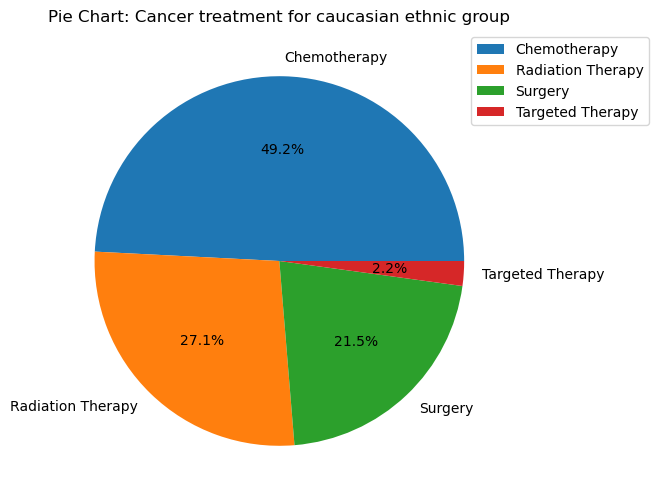

In [4]:
from src.wrangling.userInterface.user_selections import set_patient_ethnicity
from src.wrangling.extract_data_pd import treatment_for_ethnicity
from src.wrangling.userInterface.visualise.plot_data import plot_treatment_proportion_for_ethnicity

ethnicity = set_patient_ethnicity()

count, labels = treatment_for_ethnicity(ethnicity, lung_cancer_df)

plot_treatment_proportion_for_ethnicity(ethnicity, count, labels)


## c2. Create a chart to show the trend of average smoking packs consumption across different cancer stages for each ethnicity within a single chart.

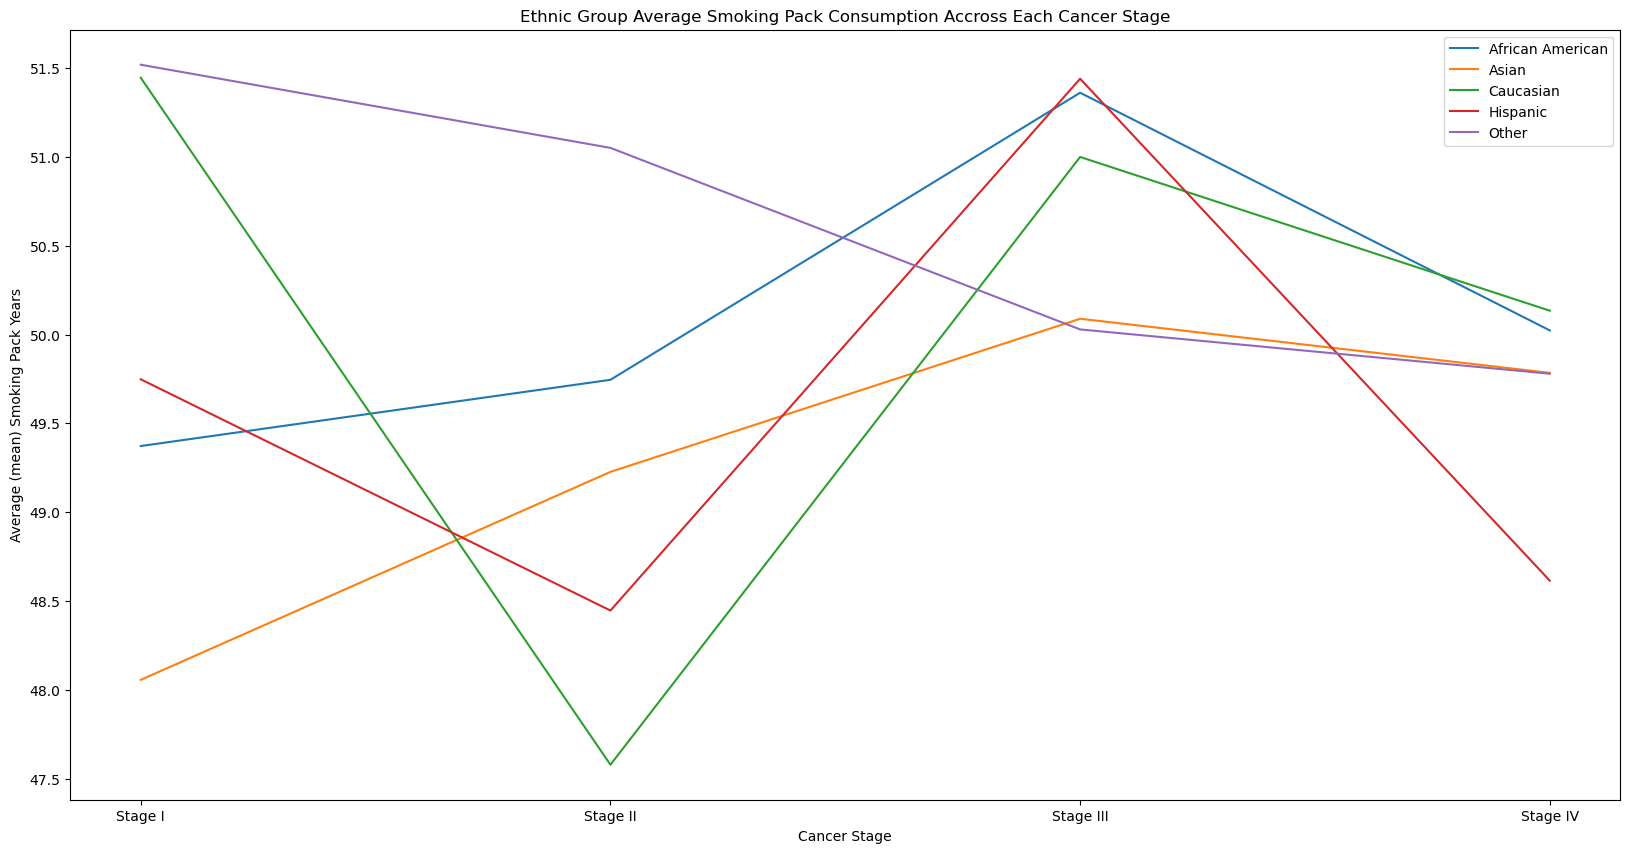

In [3]:
from src.wrangling.extract_data_pd import smoking_packs_cancer_stage

smoking_packs_cancer_stage(lung_cancer_df)


## c3. Create a chart that visually compares the average of all blood pressure types across different treatment types within a single chart

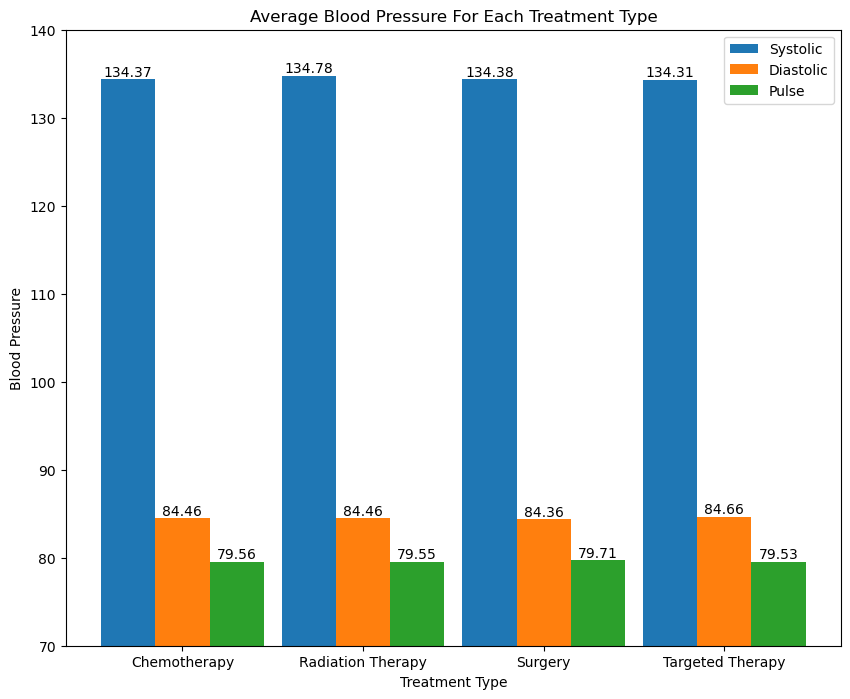

In [ ]:
from src.wrangling.extract_data_pd import blood_pressure_treatment
from src.wrangling.userInterface.visualise.plot_data import plot_blood_pressure_treatment

blood_pressure_data = blood_pressure_treatment(lung_cancer_df)
plot_blood_pressure_treatment(blood_pressure_data)


## c4. Create a visualisation of your selection to showcase information related to patients, treatment, or conditions that can reveal trends, behaviours, or patterns, ensuring it is distinct from previous requirements.

### problem statement

Show the pattern of treatment types for each insurer by using the count of each treatment type

### Solution

A bar chart showing the following information:

    - x axis of labels corresponding to each insurer
    - For each insurer, a bar containing the counts of each treatment
    - y axis shows the treatment count

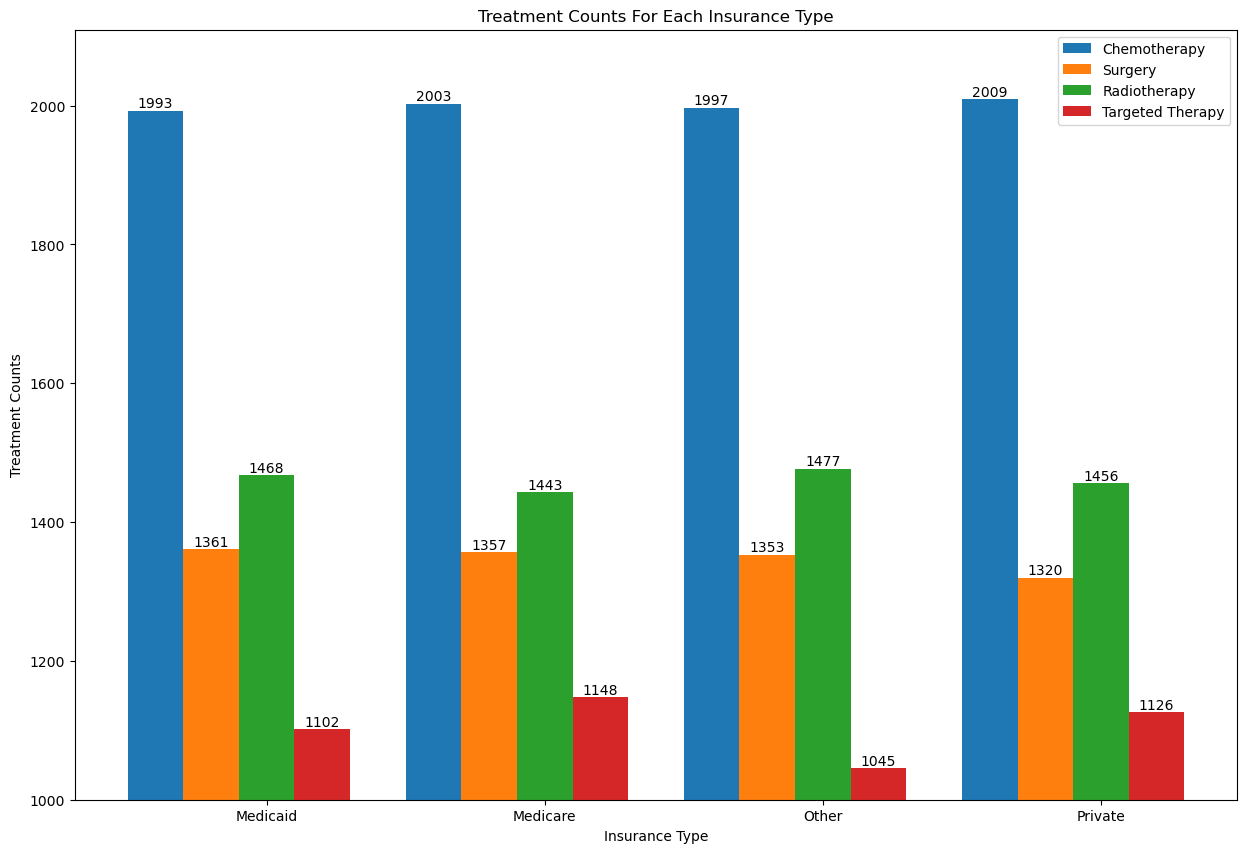

In [ ]:
treatment_provider_df = lung_cancer_df.loc[:, ['Treatment', 'Insurance_Type']]

""" in order to get a repeatable order of treatments, that correspond to each insurer
    the value counts series must be sorted by its index.
    The index is then reset to return a DataFrame for further wrangling
    This also provides the value counts as column in the new DataFrame.
"""
insurance_treatment_counts = treatment_provider_df.groupby(['Treatment']).Insurance_Type.value_counts().sort_index().reset_index()

# x axis labels
labels = insurance_treatment_counts['Insurance_Type'].unique()
x_axis = np.arange(len(labels))

# in order to get the count of each treatment, the DataFrame must me grouped by Treatment
treatment_groups_df = insurance_treatment_counts.groupby('Treatment')

# get the count of each treatment
y_chemo_count = treatment_groups_df.get_group('Chemotherapy')['count'].to_list()
y_surgery_count = treatment_groups_df.get_group('Surgery')['count'].to_list()
y_radio_count = treatment_groups_df.get_group('Radiation Therapy')['count'].to_list()
y_targeted_count = treatment_groups_df.get_group('Targeted Therapy')['count'].to_list()

fig = plt.figure(figsize=(15,10))

treatment_bars = []
bar_width = 0.2
treatment_bars.append(plt.bar(x_axis-0.4, y_chemo_count, width=bar_width, label='Chemotherapy'))
treatment_bars.append(plt.bar(x_axis-0.2, y_surgery_count, width=bar_width, label='Surgery'))
treatment_bars.append(plt.bar(x_axis, y_radio_count, width=bar_width, label="Radiotherapy"))
treatment_bars.append(plt.bar(x_axis+0.2, y_targeted_count, width=bar_width, label="Targeted Therapy"))

for bar in treatment_bars:
    plt.bar_label(bar)
plt.xticks(x_axis, labels)
plt.xlabel("Insurance Type")
plt.ylabel("Treatment Counts")
plt.ylim(bottom=1000)
plt.legend()
plt.title("Treatment Counts For Each Insurance Type")
plt.show()